# Titanic solutions

* Импортируем модуль pandas для работы с датафреймом

In [1]:
import pandas as pd

* Имортируем модули seaborn и matplotlib для визуализации данных

In [2]:
import seaborn as sb
import matplotlib as plt

In [3]:
import sklearn.tree as st

* Нам известно общее число людей на борту и количество умерших:

In [3]:
all_people = 2224
killing = 1502

* Работа с данными: помещаем датасеты в датафрэймы, тренировочный в ds_train и тестовый в ds_test

In [6]:
file_name_train = "C:\\1_CODE\\Datasets\\Titanic\\train.csv"
file_name_test = "C:\\1_CODE\\Datasets\\Titanic\\test.csv"
file_name_test_y = "C:\\1_CODE\\Datasets\\Titanic\\gender_submission.csv"

In [7]:
ds_train = pd.read_csv(file_name_train)
ds_test = pd.read_csv(file_name_test)
test_y = pd.read_csv(file_name_test_y)

* Выводим значения названий колонок

In [5]:
print(ds_train.columns.values)    

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Пояснения к названию колонок:
>*Pclass*: показатель социально-экономического статуса (1 -> 3, в порядке убывания)
>
>*SibSp* -> (Sibling, Spouse): братья и сестеры / супруги на борту
>
>*Parch* -> (Parent, Child) : дети / родители на борту
>
>*Fare* : плата за проезд
>
>*Embarked* : порт посадки, С = Шербур, Q = Квинстаун, S = Саутгемптон

* Выводим превью, чтобы понимать, что находится в датафрейме

In [31]:
ds_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Нам необходимо проанализировать следующее:
* * Какие столбцы содержат нулевые или пустые значения
* * Какие типы содержатся в колонках


* Мы замечаем, что как в тестовой, так и в тренировочной выборках много null значений в колонке Cabin, что говорит о том, что в дальнейшем эта колонка будет удалена, т.к. она малоинформативна. 

* В колонке возраста также наблюдается некоторый процент null значений, однако этот признак наиболее вероятно будет иметь значение в вопросе о выживаемости, а значит в дальнейшем необходимо будет дополнить пустые ячейки. 

* Колонка пола, которая вероятно будет иметь вес в вероятности выживаемости, имеет тип значений Object, а значит в дальнейшем необходимо будет заменить значения эквивалентами, например: male/female — 0/1 

In [36]:
ds_train.info()
print('\n'+'~'*40+'\n')
ds_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passeng

# Cтатистические характеристики

определяем всевозможные процентные соотношения, взаимосвязи и др. характеристики

#### Процент людей обучающей выборки от общего числа на борту:

In [43]:
print('≈', round(ds_train.shape[0]/all_people*100), '%')

≈ 40 %


#### Процент выживших от общего числа пассажиров:

In [44]:
print('≈', round((all_people - killing) / all_people * 100), '%')

≈ 32 %


#### Процент выживших в обучающей выборке train:

In [45]:
print('≈', round(ds_train[ds_train.Survived == 1].shape[0] / ds_train.shape[0] * 100), '%')

≈ 38 %


#### Процент пассажиров без родителей/детей:

In [42]:
print('≈', round(ds_train[ds_train.Parch == 0]['Parch'].shape[0]/ds_train.shape[0]*100), '%')

≈ 76 %


#### Процент пассажиров c братьями или сестерами/ мужьями или женами:

In [51]:
print('≈', round(ds_train[ds_train.SibSp == 1]['SibSp'].shape[0]/ds_train.shape[0]*100), '%')

≈ 23 %


#### Максимальная и минимальная оплата, процент пассажиров, стоимость проезда которых >= 512 : 

In [11]:
print("min : ", ds_train.Fare.min(), ' ', "max : ", ds_train.Fare.max())
print(round(ds_train[ds_train.Fare >= 512]['Fare'].count()/ds_train.shape[0]*100, 2),  "%")

min :  0.0   max :  512.3292
0.34 %


#### Процент пассажиров пожилого возраста:

In [14]:
print(round(ds_train[ds_train.Age > 65].shape[0]/ds_train.shape[0]*100, 2), "%")

0.9 %


#### Среднее значение возраста среди выживших людей:

In [18]:
mean = ds_train[ds_train.Survived == 1]['Age'].mean()
print("mean : ", round(mean, 2))

mean :  28.34


#### Мы можем получить статистические данные путем вызова метода describe для числовых и объектных признаков

* count — количество ячеек не NaN
* mean  — среднее значение
* std    — стандартное отклонение
* min   — минимальное значение
* 25, 50, 75 % — персентили
* max   — максимальное значение

In [19]:
ds_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* unique — количество уникальных значений
* top — наиболее часто встречаемое значение
* freq — количество раз, которое встречается значение выше

In [66]:
ds_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Glynn, Miss. Mary Agatha",male,1601,G6,S
freq,1,577,7,4,644


* Мы видим, что чаще в датасете встречаются представити мужского пола, что составляет:

In [69]:
print(round(577/ds_train.shape[0]*100, 2), "%")

64.76 %


* Cтоит отметить, что уникальность билетов не достаточно высока:

In [9]:
print(round(681/891*100, 2), "%")

76.43 %


* Уникальность кабин также невелика:

In [10]:
print(round(147/204*100, 2), "%")

72.06 %


### Выводы из статистических характеристик:


1. Колонку "возраст" необходимо дополнить значениями, поскольку данный признак определенно связан с выживаемостью, о чем свидетельствует гистограмма ниже: представители женского пола в большем количестве выжили, а представители мужского пола — наоборот

<AxesSubplot:xlabel='Survived', ylabel='Sex'>

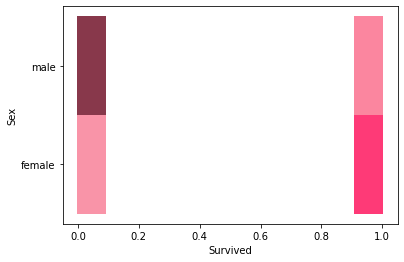

In [16]:
sb.histplot(data = ds_train[['Sex', 'Survived']] , y = 'Sex', x = 'Survived', color = "pink")

2. Колонка "Ticket" может быть удалена, поскольку она содержит большое количество дубликатов (24%) и может не быть корреляции между билетом и выживаемостью.

3. Колонка "Cabin" может быть удалена, поскольку она содержит много нулевых значений как в обучающем, так и в тестовом наборе данных.

4. Колонка "PassengerId" может быть исключена из набора обучающих данных, поскольку она не способствует выживанию.

5. Характеристика "Name" относительно нестандартна, а значит не может напрямую способствовать выживанию, поэтому может быть удалена.

### Предположения касаемо дальнейших действий:

1. Извленчение признака статуса/положения из имени в качестве новой колонки со следующим содержанием: Mr., Mrs., Master., Miss. и др.


2. Выделение возрастных групп (превращение числового признака "Age" в категориальный), это полезно тем, что такой признак будет более информативен.

3. Иакже возможно создание диапозонов тарифов, если это поможет анализу.

4. Создание нового прихнака "Family" на основе Parch и SibSp, чтобы получить общее количество членов семьи на борту

### Предположения:

1. Представители женского пола имели больше шансов выжить


2. С наибольшей вероятностью представители высшего класса выжили

3. Дети имели больше шансов выжить

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

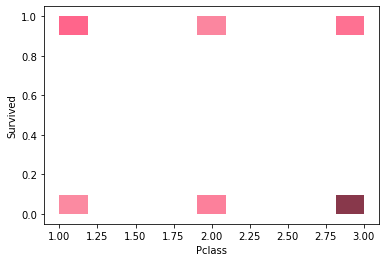

In [20]:
sb.histplot(data = ds_train[['Pclass', 'Survived']] , x = 'Pclass', y = 'Survived', color = "pink")

### Корреляция
насколько хорошо каждая функция соотносится с выживанием


1. Признак "Pclass"
    *можем заметить: выживаемость среди людей первого класса наибольшая, что подтверждает наше предположение №2*

In [40]:
ds_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


2. Признак "Sex", *можем заметить: у представителей женского пола наибольшая выживаемость, что подтверждает предположение №1*

In [39]:
ds_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


3. Признак "SibSp", *можем заметить: наибольшая выживаемость у тех, кто был на борту с супругом/супругой или братьями/сестрами (максимум двумя), а также у тех, кто был на борту один, но уже меньше*

In [44]:
ds_train[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


3. Признак "Parch", *можем заметить: наибольшая выживаемость с минимальным количесвом детей и рожителей, однако их наиличие все же играет роль, т.к. при значении = 0, шансы значительно меньше*

In [45]:
ds_train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


4. Признак "Embarked", *можем заметить: выживаемость тех, у кого порт посадки С(Шербур) выше, чем у тех, у кого порт посадки Q(Квинстаун) или S(Саутгемптон)*

In [100]:
ds_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


### Графическое подтверждение предположений

#### Признак "Age"
Можем заметить: 
* подтверждение предположения о том, что дети имеют бо́льшие шансы на выживание (<= 5 лет)
* бо́льшая часть людей, находящихся на борту, относится к возрастной группе 15—35, 
* бо́льшее количество 15—30-летних не выжило
* все пожилые люди с возрастом около 80 выжили, т.е. самые старые

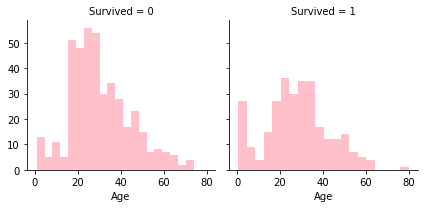

In [57]:
g = sb.FacetGrid(ds_train, col='Survived')
g.map(plt.pyplot.hist, 'Age', bins=20, color = 'pink')

<AxesSubplot:xlabel='Survived', ylabel='Age'>

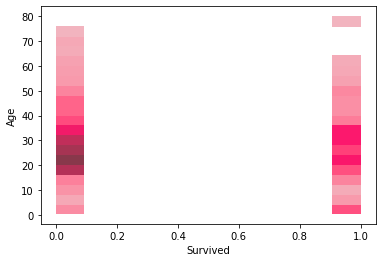

In [46]:
sb.histplot(data = ds_train[['Age', 'Survived']] , y = 'Age', x = 'Survived', color = "pink")

#### Признак "Pclass"
Можем заметить:
* бо́льшая часть людей, находившихся на борту, принадлежала к третьему классу, погибло больше всего в нем же 
* маленькие дети в основном выжили, что подтверждает предположение о том, что дети имеют бо́льшие шансы на выживание
* большинство пассажиров принадлежащих первому классу выжили, что подтверждает предположение №2 
* Pclass зависит от возраста, бо́льшая часть молодых людей принадлежит третьему классу, в то время как первому пассажиры постарше

C:\1_CODE\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


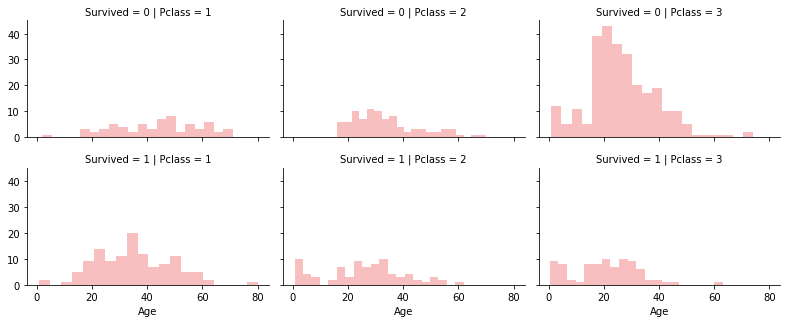

In [27]:
grid = sb.FacetGrid(ds_train, col='Pclass', row='Survived', size=2.3, aspect=1.6)
grid.map(plt.pyplot.hist, 'Age', alpha=.5, bins=20, color='lightcoral')

#### Признак "Fare"

Можем заметить:
* признак можно разделить на диапазоны, ведь в некоторых интервалах выживаемость больше, а в каких-то меньше, также это облегчит анализ, т.к. числовой непрерывный признак превратится в категориальный
* выживаемость выше, если оплата находится ближе к верхней границе, что подтверждает предположение №2

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

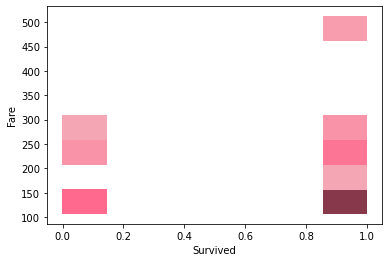

In [94]:
sb.histplot(data = ds_train[['Fare', 'Survived']][ds_train.Fare >= 100] , y = 'Fare', x = 'Survived', color = "pink")

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

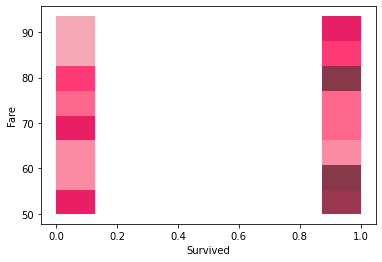

In [95]:
sb.histplot(data = ds_train[['Fare', 'Survived']][(ds_train.Fare <= 100) & (ds_train.Fare >= 50)] , y = 'Fare', x = 'Survived', color = "pink")

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

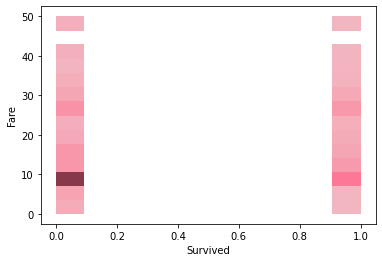

In [102]:
sb.histplot(data = ds_train[['Fare', 'Survived']][ds_train.Fare <= 50] , y = 'Fare', x = 'Survived', color = "pink")

#### Признак "Ticket"

Можем заметить: 
* нет явной зависимости выживаемости от билета, а также стоит вспомнить о том, что уникальность данного признака не так высока (76%) 

<AxesSubplot:xlabel='Survived', ylabel='Ticket'>

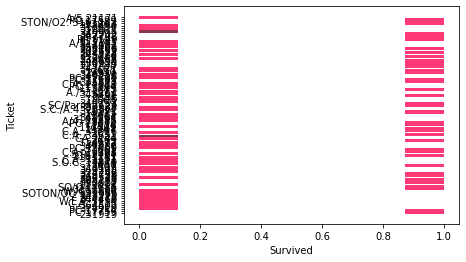

In [107]:
sb.histplot(data = ds_train[['Ticket', 'Survived']][ds_train.PassengerId < 100] , y = 'Ticket', x = 'Survived', color = "pink")

#### Признак "Embarked"
Можем заметить:
* нет явных зависимостей от порта в вопросе о выживаемости,несмотря на то что в сравнении средних выживаемость тех, у кого порт посадки был С(Шербур) выше

In [98]:
ds_embarked = new_ds_for_analisys_embarked(ds_train)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

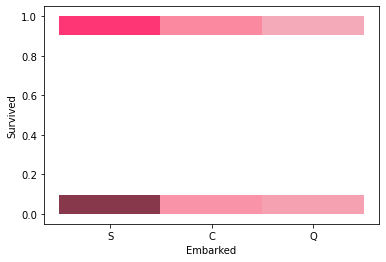

In [99]:
sb.histplot(data = ds_embarked[['Embarked', 'Survived']] , x = 'Embarked', y = 'Survived', color = "pink")

### Промежуточный итог

1. Колонка "PassengerId" может быть удалена ввиду отсутствия информативности

2. Колонка "Ticket" может быть удалена, поскольку она содержит большое количество дубликатов (24%) и нет явной корреляции между билетом и выживаемостью

3. Колонка "Cabin" может быть удалена, поскольку количество пустых значений как в обучающем наборе, так и тестовом слишком большое (687/891 в обучающем, 327/418 в тестовом), процент уникальности также не велик (72%)

4.  Колонка "Embarked" может быть удалена, поскольку данный признак является сомнительным в вопросе взаимосвязи с выживаемостью, однако не исключает связи с другими признаками

5. Признак "Pclass" является значимим в определении выживаемости, а также найдены закономерности с возрастом; поддтвердилось предположение о том, что представители первого класса наиболее вероятно выживут

6. Колонка "Name" сама по себе не информативна, однако можно найти связь между статусом/положением и выживаемостью, для чего необходимо преобразовать колонку "Name", чтобы остались лишь такие значения: Mr., Mrs., Miss, Master и др., а в дальнейшем, если будет установлена связь, преобразовать к числовому типу, заменяя на эквивалентные значения, например: Mr. - 1, Mrs. - 2 и т.д.

7. Признак "Sex" является значимим в определении выживаемости, его необходимо преобразовать в числовой, заменяя на эквивалентные значения female/male = 0/1

8. Признак "Age" является значимим в определении выживаемости, также была выявлена необходимость в группировке по возрастным группам для облегчения анализа и увеличения информативности

9. Признаки "SibSp" и "Parch" является значимими в определении выживаемости, можно попробовать их объединить, чтобы посмотреть взаимосвязь количества членов семьи на борту и выживаемости

10. Признак "Fare" является значимим в определении выживаемости, была выявлена необходимость в группировке по тарифным диапазонам для облегчения анализа и увеличения информативности

### Очистка и преобразование данных

#### Объединение датафрэймов для удобства преобразований

In [16]:
combine = [ds_train, ds_test]

#### Удаление колонок

* Удаляем следующие, как выяснилось, ненужные колонки: "Ticket", "Cabin" и "Embarked"
<!-- * Над данными будут совершаться преобразования, поэтому необходимо объединить тестовый и обучающий наборы -->

In [8]:
ds_train = ds_train.drop(['Ticket', 'Cabin', 'Embarked'], axis=1)
ds_test = ds_test.drop(['Ticket', 'Cabin', 'Embarked'], axis=1)

In [9]:
ds_train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25


In [10]:
ds_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292


#### Выявление корреляции между титулом/положением и выживаемостью

* Конструируем из колонки "Name" новый признак, обозначающий титул/положение
- Перед титулом/положением пробел, а после стоит .  ⇒ мы можем использовать данные символы для границ регулярного выражения

In [11]:
ds_for_check = ds_train.copy()

In [12]:
ds_for_check['Title'] = ds_train.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

<AxesSubplot:xlabel='Count', ylabel='Title'>

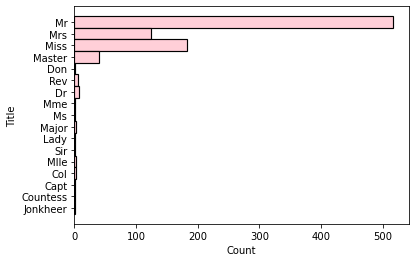

In [13]:
sb.histplot(data = ds_for_check[['Title']] , y = 'Title', color = "pink")

In [90]:
ds_for_check[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
16,Sir,1.000000
2,Countess,1.000000
14,Ms,1.000000
11,Mme,1.000000
6,Lady,1.000000
10,Mlle,1.000000
13,Mrs,0.792000
9,Miss,0.697802
8,Master,0.575000
1,Col,0.500000


* Мы видим, что между титулом/положением и выживаемотью есть взаимосвязь, однако добавить сразу колонку "Title" мы не можем, поскольку есть много редких значений, которые могут сбить с толку, человек мог быть один и выжить, но это не значит, что человек, имеющий тот же признак, однозначно бы выжил. 

In [14]:
ds_for_check['Title'] = ds_for_check['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                               'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

ds_for_check['Title'] = ds_for_check['Title'].replace(['Mlle', 'Ms'], 'Miss')

ds_for_check['Title'] = ds_for_check['Title'].replace('Mme', 'Mrs')

In [92]:
ds_for_check.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

* Можно заметить, что теперь взаимосвязь между титулом/положением и выживаемостью стала яснее 
* Теперь необходимо преобразовать категориальный признак "Title" в числовой, чтобы с ним было легче работать

In [93]:
ds_for_check[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.702703
0,Master,0.575000
4,Rare,0.347826
2,Mr,0.156673


* После проверки, в результате которой мы убедились в правильности предположения, мы можем совершить те же преобразования над настоящими датафрэймами

In [17]:
for ds in combine:
    ds['Title'] = ds.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [18]:
for ds in combine:
    ds['Title'] = ds['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 
                                               'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    
    ds['Title'] = ds['Title'].replace(['Mlle', 'Ms'], 'Miss')

    ds['Title'] = ds['Title'].replace('Mme', 'Mrs')

In [19]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for ds in combine:
    ds['Title'] = ds['Title'].map(title_mapping)
    ds['Title'] = ds['Title'].fillna(0)


#### Удаляем неинформативные после преобразований колонки 

In [20]:
ds_train = ds_train.drop(['Name', 'PassengerId'], axis=1)
ds_test = ds_test.drop(['Name'], axis=1)

In [21]:
ds_train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,male,22.0,1,0,7.25,1


In [22]:
ds_test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,892,3,male,34.5,0,0,7.8292,1


#### Преобразование признака "Sex"

In [23]:
ds_train['Sex'] = ds_train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
ds_test['Sex'] = ds_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [24]:
ds_train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,0,22.0,1,0,7.25,1


#### Преобразование признака "Age"

* Данный признак имеет пустые значения, необходимо их заполнить, это можно сделать следующими способами:
1. Заполнить пробелы средними значениями
2. Зполнить пробелы средними значениями с учетом других признаков и корреляции между ними и возрастом
3. Удалить строки с пустыми значениями

* Отобразим зависимость между возрастом и другими признаками

female = 0 
male = 1


C:\1_CODE\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


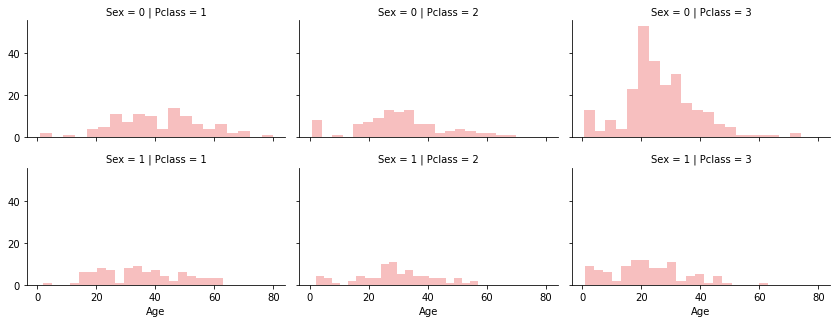

In [30]:
print('female = 0 \nmale = 1')
grid = sb.FacetGrid(ds_train, col='Pclass', row='Sex', size=2.3, aspect=1.7)
grid.map(plt.pyplot.hist, 'Age', alpha=.5, bins=20, color='lightcoral')

female = 0 
male = 1


C:\1_CODE\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


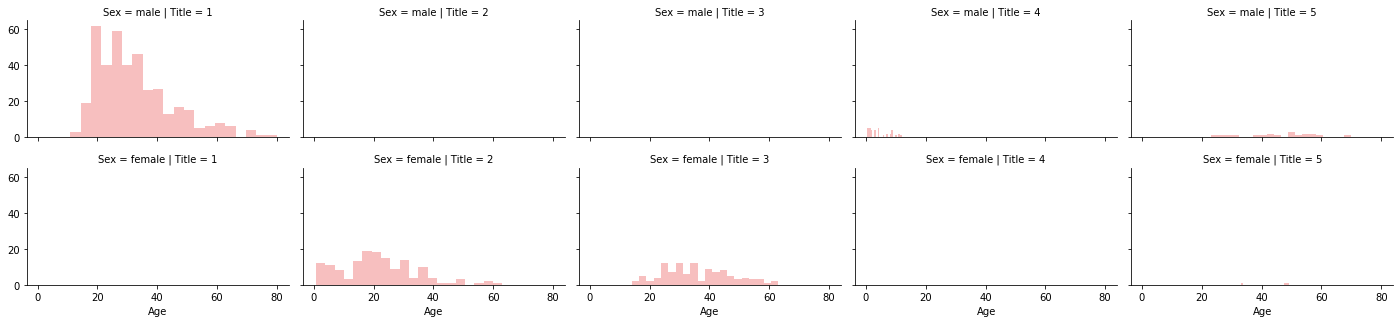

In [106]:
print('female = 0 \nmale = 1')
grid = sb.FacetGrid(ds_train, col='Title', row='Sex', size=2.3, aspect=1.7)
grid.map(plt.pyplot.hist, 'Age', alpha=.5, bins=20, color='lightcoral')

In [25]:
ds_train.loc[ ds_train['Age'] <= 16, 'Age'] = 0
ds_train.loc[(ds_train['Age'] > 16) & (ds_train['Age'] <= 32), 'Age'] = 1
ds_train.loc[(ds_train['Age'] > 32) & (ds_train['Age'] <= 48), 'Age'] = 2
ds_train.loc[(ds_train['Age'] > 48) & (ds_train['Age'] <= 64), 'Age'] = 3
ds_train.loc[ ds_train['Age'] > 64, 'Age'] = 4

In [26]:
ds_test.loc[ ds_test['Age'] <= 16, 'Age'] = 0
ds_test.loc[(ds_test['Age'] > 16) & (ds_test['Age'] <= 32), 'Age'] = 1
ds_test.loc[(ds_test['Age'] > 32) & (ds_test['Age'] <= 48), 'Age'] = 2
ds_test.loc[(ds_test['Age'] > 48) & (ds_test['Age'] <= 64), 'Age'] = 3
ds_test.loc[ ds_test['Age'] > 64, 'Age'] = 4

In [27]:
ds_train = ds_train.dropna(axis=0)

In [28]:
ds_test = ds_test.dropna(axis=0)

In [29]:
ds_train['Age'] = ds_train['Age'].astype(int)

In [30]:
ds_test['Age'] = ds_test['Age'].astype(int)

In [31]:
ds_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,892,3,0,2,0,0,7.8292,1
1,893,3,1,2,1,0,7.0000,3
2,894,2,0,3,0,0,9.6875,1
3,895,3,0,1,0,0,8.6625,1
4,896,3,1,1,1,1,12.2875,3
...,...,...,...,...,...,...,...,...
409,1301,3,1,0,1,1,13.7750,2
411,1303,1,1,2,1,0,90.0000,3
412,1304,3,1,1,0,0,7.7750,2
414,1306,1,1,2,0,0,108.9000,5


#### Преобразование признака "Fare"

In [32]:
ds_test['Fare'].fillna(ds_test['Fare'].dropna().median(), inplace=True)

In [33]:
ds_train['Fare'].fillna(ds_train['Fare'].dropna().median(), inplace=True)

In [34]:
ds_train.loc[ ds_train['Fare'] <= 7.91, 'Fare'] = 0
ds_train.loc[(ds_train['Fare'] > 7.91) & (ds_train['Fare'] <= 14.454), 'Fare'] = 1
ds_train.loc[(ds_train['Fare'] > 14.454) & (ds_train['Fare'] <= 31), 'Fare']   = 2
ds_train.loc[ ds_train['Fare'] > 31, 'Fare'] = 3
ds_train['Fare'] = ds_train['Fare'].astype(int)

In [35]:
ds_test.loc[ ds_test['Fare'] <= 7.91, 'Fare'] = 0
ds_test.loc[(ds_test['Fare'] > 7.91) & (ds_test['Fare'] <= 14.454), 'Fare'] = 1
ds_test.loc[(ds_test['Fare'] > 14.454) & (ds_test['Fare'] <= 31), 'Fare']   = 2
ds_test.loc[ ds_test['Fare'] > 31, 'Fare'] = 3
ds_test['Fare'] = ds_test['Fare'].astype(int)

In [36]:
ds_train.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,0,3,0,1,1,0,0,1


In [37]:
ds_test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Title
0,892,3,0,2,0,0,0,1


### Модель и предсказание

* Теперь мы готовы обучить модель и спрогнозировать необходимое решение.
* Необходимо выбрать подходящую модель: необходимо определить взаимосвязь между выходными данными (выжившие или нет) с другими переменными или характеристиками (пол, возраст, порт ...)
* Мы также реализуем категорию машинного обучения, которая называется обучением с учителем, поскольку мы обучаем нашу модель с заданным набором данных

К подходящим моделям относятся:

+ Logistic Regression
+ KNN or k-Nearest Neighbors
+ Support Vector Machines
+ Naive Bayes classifier
+ **Decision Tree**
+ Random Forrest
+ Perceptron
+ Artificial neural network
+ RVM or Relevance Vector Machine

#### Decision Tree

Эта модель использует дерево решений в качестве модели прогнозирования, которая сопоставляет функции (ветви дерева) с выводами о целевом значении (листья дерева). Модели деревьев, в которых целевая переменная может принимать конечный набор значений, называются деревьями классификации; в этих древовидных структурах листья представляют метки классов, а ветви представляют соединения функций, которые ведут к этим меткам классов. Деревья решений, в которых целевая переменная может принимать непрерывные значения (обычно действительные числа), называются деревьями регрессии.

In [39]:
X_train = ds_train.drop("Survived", axis=1)
Y_train = ds_train["Survived"]
X_test  = ds_test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((714, 7), (714,), (331, 7))

In [53]:
decision_tree = st.DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

88.38

----
##### Вспомогательные функции

In [23]:
def new_ds_for_analisys_embarked(ds_train):
    ds = ds_train[ds_train.Embarked == 'S']
    ds = ds.append(ds_train[ds_train.Embarked == 'C'])
    ds = ds.append(ds_train[ds_train.Embarked == 'Q'])
    return ds